In [1]:
import torchvision.transforms.v2 as v2
from torchvision.models.segmentation import fcn_resnet50
from torch import optim
import torch

from pathlib import Path
from dlvc.dataset.oxfordpets import OxfordPetsCustom
from dlvc.utils import display_images_and_masks
from dlvc.trainer import ImgSemSegTrainer
from dlvc.metrics import SegMetrics
from dlvc.utils import LabelDecrementor
from dlvc.models.resnet50_wrapper import Resnet50Wrapper


In [2]:
oxford_pets_path = "data/"
train_transform = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Resize(size=(64,64), interpolation=v2.InterpolationMode.NEAREST),
                        v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])])
train_transform2 = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.long, scale=False),
                        v2.Resize(size=(64,64), interpolation=v2.InterpolationMode.NEAREST),
                        LabelDecrementor()])#,

val_transform = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.float32, scale=True),
                        v2.Resize(size=(64,64), interpolation=v2.InterpolationMode.NEAREST),
                        v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])])
val_transform2 = v2.Compose([v2.ToImage(), 
                        v2.ToDtype(torch.long, scale=False),
                        v2.Resize(size=(64,64), interpolation=v2.InterpolationMode.NEAREST),
                        LabelDecrementor()])

train_data = OxfordPetsCustom(root=oxford_pets_path, 
                        split="trainval",
                        target_types='segmentation', 
                        transform=train_transform,
                        target_transform=train_transform2,
                        download=True)

val_data = OxfordPetsCustom(root=oxford_pets_path, 
                        split="test",
                        target_types='segmentation', 
                        transform=val_transform,
                        target_transform=val_transform2,
                        download=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


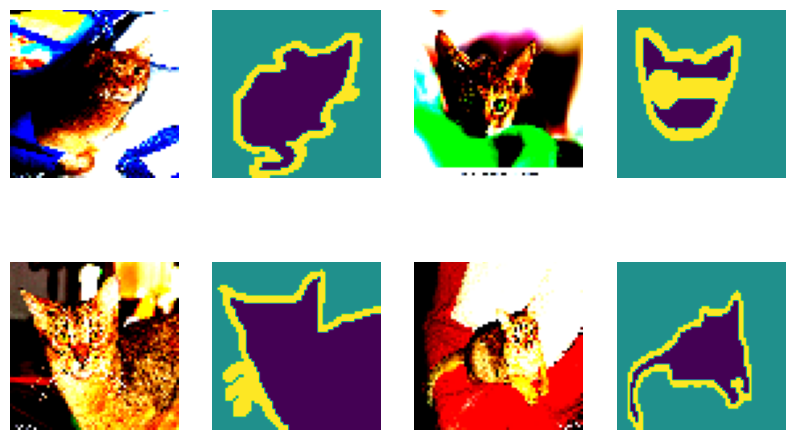

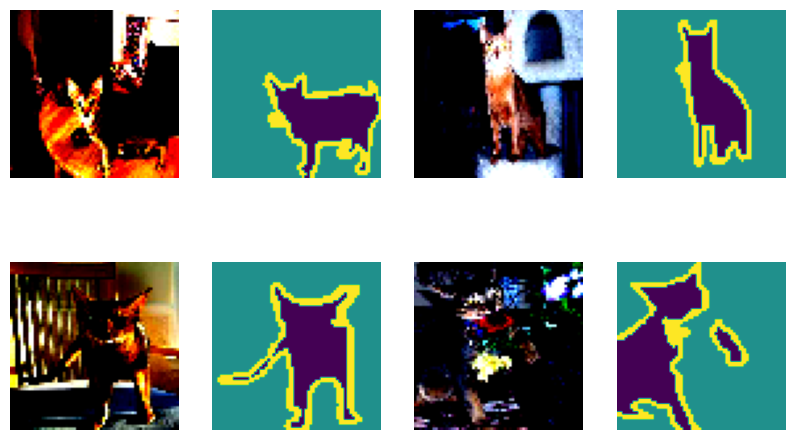

In [3]:
# Display 4 training and test images.
display_images_and_masks(train_data, indexes=(0, 1, 2, 3))
display_images_and_masks(val_data, indexes=(0, 1, 2, 3))

In [4]:
model = Resnet50Wrapper(3,True)



optimizer = optim.Adam(model.parameters())
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.09)
loss_fn = torch.nn.CrossEntropyLoss()
device = torch.device("cpu")

segMetricsTrain = SegMetrics(train_data.classes_seg)
segMetricsVal = SegMetrics(val_data.classes_seg)


trainer = ImgSemSegTrainer(
    model,
    optimizer,
    loss_fn,
    lr_scheduler,
    segMetricsTrain,
    segMetricsVal,
    train_data,
    val_data,
    device,
    5,
    "weights/fcn_resnet50_weighted_True.pt",
    batch_size=128,
    val_frequency=1
)

In [5]:
model

Resnet50Wrapper(
  (model): FCN(
    (backbone): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (

In [6]:
trainer.train()

train epoch: 100%|██████████| 29/29.0 [03:25<00:00,  7.08s/it]



TRAIN, EPOCH: 0 
Loss: 0.44807159900665283\mIoU: 0.45


val epoch: 100%|██████████| 29/29.0 [01:30<00:00,  3.14s/it]



VALIDATION, EPOCH: 0 
Loss: 0.45645081996917725\mIoU: 0.51
New metric is higher. Saving new best model


train epoch: 100%|██████████| 29/29.0 [03:18<00:00,  6.83s/it]



TRAIN, EPOCH: 1 
Loss: 0.3823176622390747\mIoU: 0.53


val epoch: 100%|██████████| 29/29.0 [01:27<00:00,  3.02s/it]



VALIDATION, EPOCH: 1 
Loss: 0.4481414258480072\mIoU: 0.52
New metric is higher. Saving new best model


train epoch: 100%|██████████| 29/29.0 [03:17<00:00,  6.80s/it]



TRAIN, EPOCH: 2 
Loss: 0.37359097599983215\mIoU: 0.54


val epoch: 100%|██████████| 29/29.0 [01:28<00:00,  3.06s/it]



VALIDATION, EPOCH: 2 
Loss: 0.38183319568634033\mIoU: 0.53
New metric is higher. Saving new best model


train epoch: 100%|██████████| 29/29.0 [03:19<00:00,  6.87s/it]



TRAIN, EPOCH: 3 
Loss: 0.38343775272369385\mIoU: 0.54


val epoch: 100%|██████████| 29/29.0 [01:31<00:00,  3.14s/it]



VALIDATION, EPOCH: 3 
Loss: 0.45851224660873413\mIoU: 0.53


train epoch: 100%|██████████| 29/29.0 [03:19<00:00,  6.88s/it]



TRAIN, EPOCH: 4 
Loss: 0.3893038332462311\mIoU: 0.54


val epoch: 100%|██████████| 29/29.0 [01:29<00:00,  3.10s/it]


VALIDATION, EPOCH: 4 
Loss: 0.4101455807685852\mIoU: 0.53


In [7]:
train_metrics = trainer.metrics_train
val_metrics = trainer.metrics_val

# datafame is a list of tuples (loss, mIoU)
train_loss = [x[0] for x in train_metrics]
train_mIoU = [x[1] for x in train_metrics]
val_loss = [x[0] for x in val_metrics]
val_mIoU = [x[1] for x in val_metrics]

print(f"Train mIoU: {train_mIoU}")
print(f"Val mIoU: {val_mIoU}")

print(f"Train loss: {train_loss}")
print(f"Val loss: {val_loss}")

name = f"fcn_resnet50_weighted_{True}_metrics.csv"

# save as epoch, loss, mIoU
with open(name, "w") as f:
    f.write("epoch,loss,mIoU\n")
    for i in range(len(train_loss)):
        f.write(f"{i},{train_loss[i]},{train_mIoU[i]},train\n")
    for i in range(len(val_loss)):
        f.write(f"{i},{val_loss[i]},{val_mIoU[i]},val\n")
f.close()


Train mIoU: [0.45, 0.53, 0.54, 0.54, 0.54]
Val mIoU: [0.51, 0.52, 0.53, 0.53, 0.53]
Train loss: [0.44807159900665283, 0.3823176622390747, 0.37359097599983215, 0.38343775272369385, 0.3893038332462311]
Val loss: [0.45645081996917725, 0.4481414258480072, 0.38183319568634033, 0.45851224660873413, 0.4101455807685852]


In [8]:
model = Resnet50Wrapper(3,False)

optimizer = optim.Adam(model.parameters())
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.09)
loss_fn = torch.nn.CrossEntropyLoss()
device = torch.device("cpu")

segMetricsTrain = SegMetrics(train_data.classes_seg)
segMetricsVal = SegMetrics(val_data.classes_seg)


trainer_false = ImgSemSegTrainer(
    model,
    optimizer,
    loss_fn,
    lr_scheduler,
    segMetricsTrain,
    segMetricsVal,
    train_data,
    val_data,
    device,
    5,
    "weights/fcn_resnet50_weighted_False.pt",
    batch_size=128,
    val_frequency=1
)

In [9]:
model

Resnet50Wrapper(
  (model): FCN(
    (backbone): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (

In [10]:
trainer_false.train()

train epoch: 100%|██████████| 29/29.0 [03:18<00:00,  6.84s/it]



TRAIN, EPOCH: 0 
Loss: 0.7440139651298523\mIoU: 0.35


val epoch: 100%|██████████| 29/29.0 [01:28<00:00,  3.06s/it]



VALIDATION, EPOCH: 0 
Loss: 0.8582305908203125\mIoU: 0.34
New metric is higher. Saving new best model


train epoch: 100%|██████████| 29/29.0 [03:21<00:00,  6.95s/it]



TRAIN, EPOCH: 1 
Loss: 0.7084754109382629\mIoU: 0.37


val epoch: 100%|██████████| 29/29.0 [01:31<00:00,  3.16s/it]



VALIDATION, EPOCH: 1 
Loss: 0.7244430184364319\mIoU: 0.37
New metric is higher. Saving new best model


train epoch: 100%|██████████| 29/29.0 [03:15<00:00,  6.74s/it]



TRAIN, EPOCH: 2 
Loss: 0.7119885087013245\mIoU: 0.38


val epoch: 100%|██████████| 29/29.0 [01:26<00:00,  2.98s/it]



VALIDATION, EPOCH: 2 
Loss: 0.7397593259811401\mIoU: 0.37


train epoch: 100%|██████████| 29/29.0 [03:16<00:00,  6.78s/it]



TRAIN, EPOCH: 3 
Loss: 0.7418763041496277\mIoU: 0.38


val epoch: 100%|██████████| 29/29.0 [01:29<00:00,  3.07s/it]



VALIDATION, EPOCH: 3 
Loss: 0.7396569848060608\mIoU: 0.37


train epoch: 100%|██████████| 29/29.0 [03:12<00:00,  6.64s/it]



TRAIN, EPOCH: 4 
Loss: 0.7062256932258606\mIoU: 0.38


val epoch: 100%|██████████| 29/29.0 [01:27<00:00,  3.02s/it]


VALIDATION, EPOCH: 4 
Loss: 0.8199940323829651\mIoU: 0.37


In [11]:
train_metrics_false = trainer_false.metrics_train
val_metrics_false = trainer_false.metrics_val

# datafame is a list of tuples (loss, mIoU)
train_loss_false = [x[0] for x in train_metrics_false]
train_mIoU_false = [x[1] for x in train_metrics_false]
val_loss_false = [x[0] for x in val_metrics_false]
val_mIoU_false = [x[1] for x in val_metrics_false]

print(f"Train mIoU: {train_mIoU_false}")
print(f"Val mIoU: {val_mIoU_false}")

print(f"Train loss: {train_loss_false}")
print(f"Val loss: {val_loss_false}")

name = f"fcn_resnet50_weighted_{False}_metrics.csv"

# save as epoch, loss, mIoU
with open(name, "w") as f:
    f.write("epoch,loss,mIoU\n")
    for i in range(len(train_loss)):
        f.write(f"{i},{train_loss_false[i]},{train_mIoU_false[i]},train\n")
    for i in range(len(val_loss)):
        f.write(f"{i},{val_loss_false[i]},{val_mIoU_false[i]},val\n")
f.close()


Train mIoU: [0.35, 0.37, 0.38, 0.38, 0.38]
Val mIoU: [0.34, 0.37, 0.37, 0.37, 0.37]
Train loss: [0.7440139651298523, 0.7084754109382629, 0.7119885087013245, 0.7418763041496277, 0.7062256932258606]
Val loss: [0.8582305908203125, 0.7244430184364319, 0.7397593259811401, 0.7396569848060608, 0.8199940323829651]


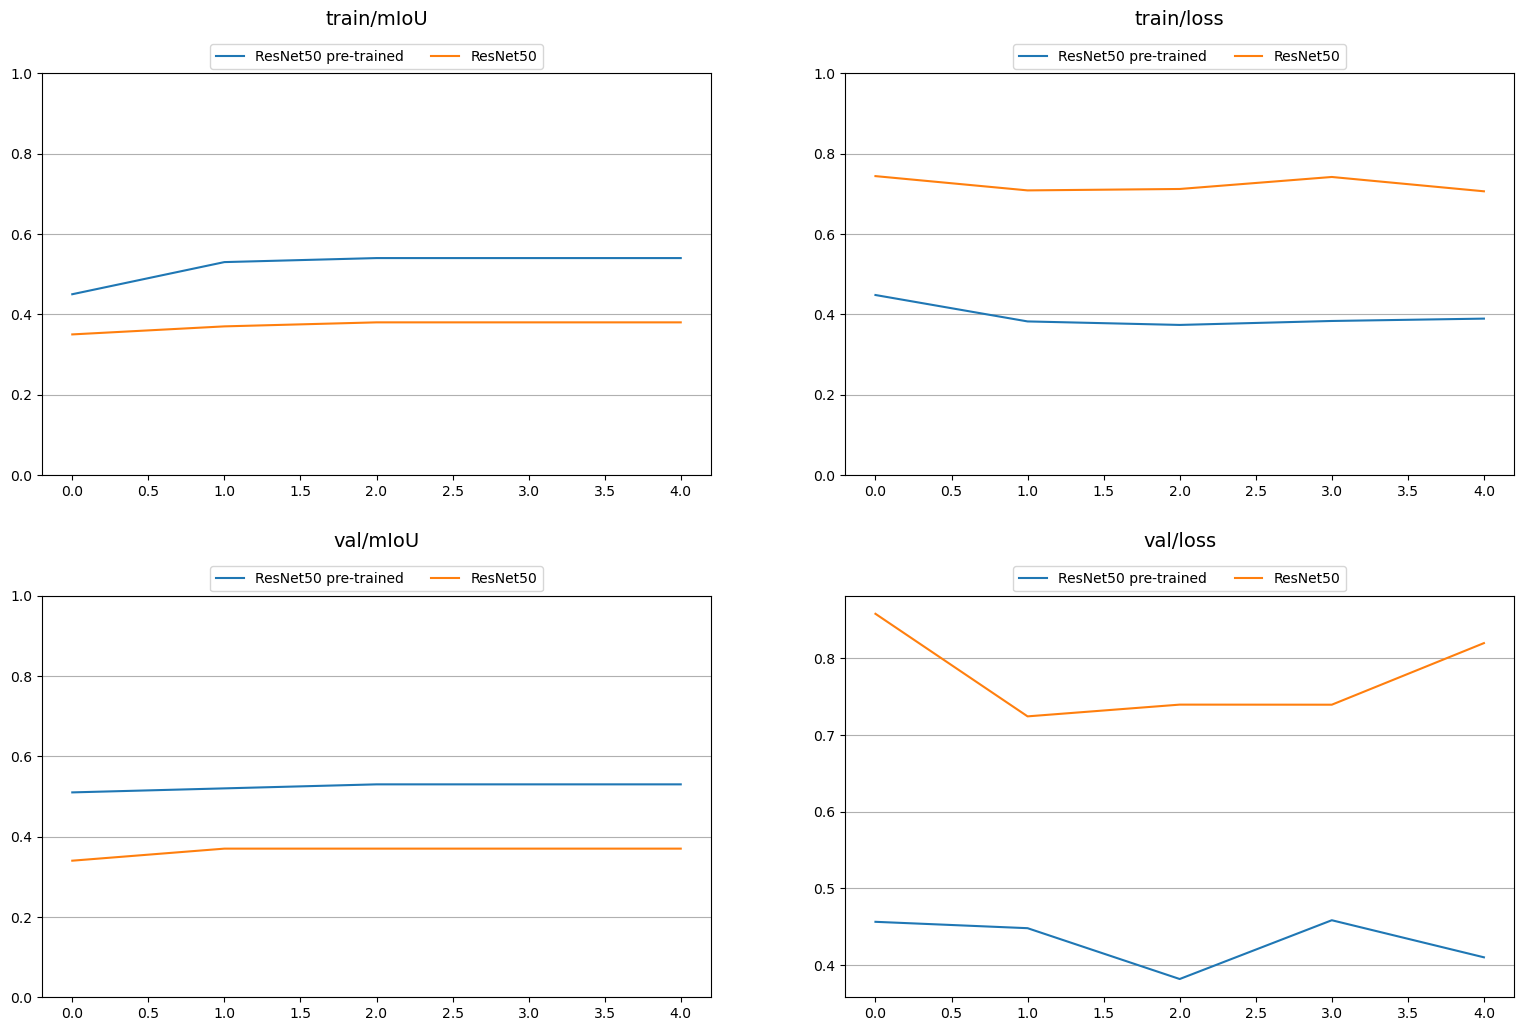

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
fig, axs = plt.subplots(2, 2, figsize=(19, 12))
formatter = FuncFormatter(lambda y, _: '{:.1f}'.format(y))  # Define the formatter

# Apply the formatter to the y-axis of each subplot
for ax in axs.flat:
    ax.yaxis.set_major_formatter(formatter)

axs[0, 0].plot(train_mIoU, label="ResNet50 pre-trained")
axs[0, 0].plot(train_mIoU_false, label="ResNet50")
axs[0, 0].set_title('train/mIoU', fontsize=14, y=1.1)
axs[0, 0].legend(fontsize=10, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.09))
axs[0, 0].set_ylim([0,1])
axs[0, 0].grid(axis='y')
axs[1, 0].plot(val_mIoU, label="ResNet50 pre-trained")
axs[1, 0].plot(val_mIoU_false, label="ResNet50")
axs[1, 0].set_title('val/mIoU', fontsize=14, y=1.1)
axs[1, 0].legend(fontsize=10, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.09))
axs[1, 0].set_ylim([0,1])
axs[1, 0].grid(axis='y')
axs[0, 1].plot(train_loss, label="ResNet50 pre-trained")
axs[0, 1].plot(train_loss_false, label="ResNet50")
axs[0, 1].set_title('train/loss', fontsize=14, y=1.1)
axs[0, 1].legend(fontsize=10, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.09))
axs[0, 1].set_ylim([0,1])
axs[0, 1].grid(axis='y')
axs[1, 1].plot(val_loss, label="ResNet50 pre-trained")
axs[1, 1].plot(val_loss_false, label="ResNet50")
axs[1, 1].set_title('val/loss', fontsize=14, y=1.1)
axs[1, 1].legend(fontsize=10, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.09))
axs[0, 1].set_ylim([0,1])
axs[1, 1].grid(axis='y')
fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.savefig("img/fcn_resnet50_weighted_vs_unweighted.png")
plt.show()

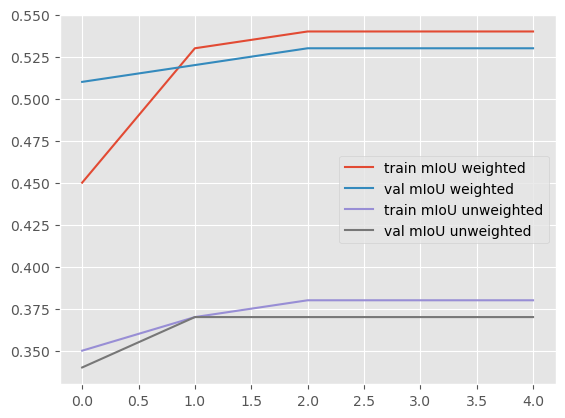

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# plot the mIoU and loss for both models
plt.plot(train_mIoU, label="train mIoU weighted")
plt.plot(val_mIoU, label="val mIoU weighted")
plt.plot(train_mIoU_false, label="train mIoU unweighted")
plt.plot(val_mIoU_false, label="val mIoU unweighted")
plt.legend()
plt.show()

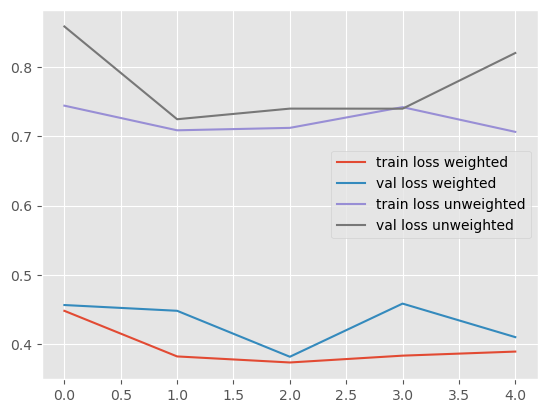

In [14]:
plt.plot(train_loss, label="train loss weighted")
plt.plot(val_loss, label="val loss weighted")
plt.plot(train_loss_false, label="train loss unweighted")
plt.plot(val_loss_false, label="val loss unweighted")
plt.legend()
plt.show()

In [15]:
from torch.utils.data import DataLoader
loader = iter(DataLoader(train_data, 1))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


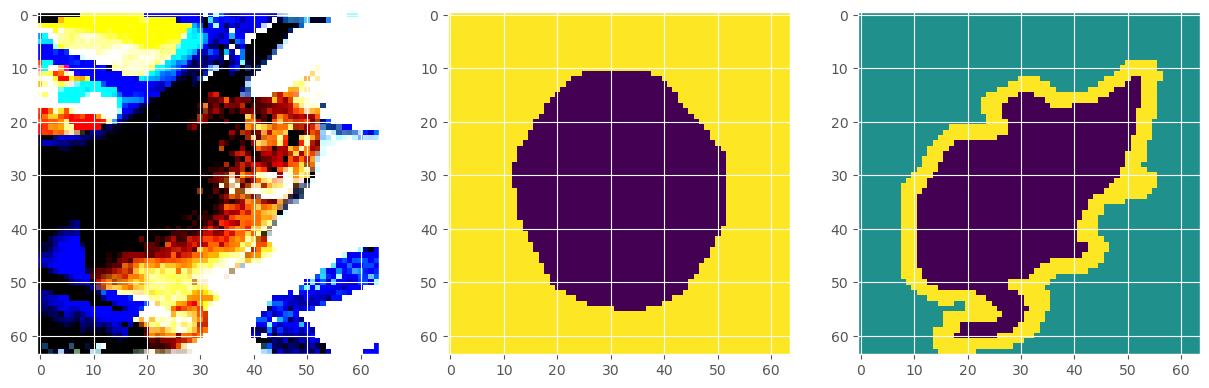

In [16]:
img, label = next(loader)
prediction = model(img)
res = prediction.argmax(dim=1)
fig, ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(img.view([3,64,64]).permute(1,2,0))
ax[1].imshow(res.view(64,64))
ax[2].imshow(label.view(64,64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


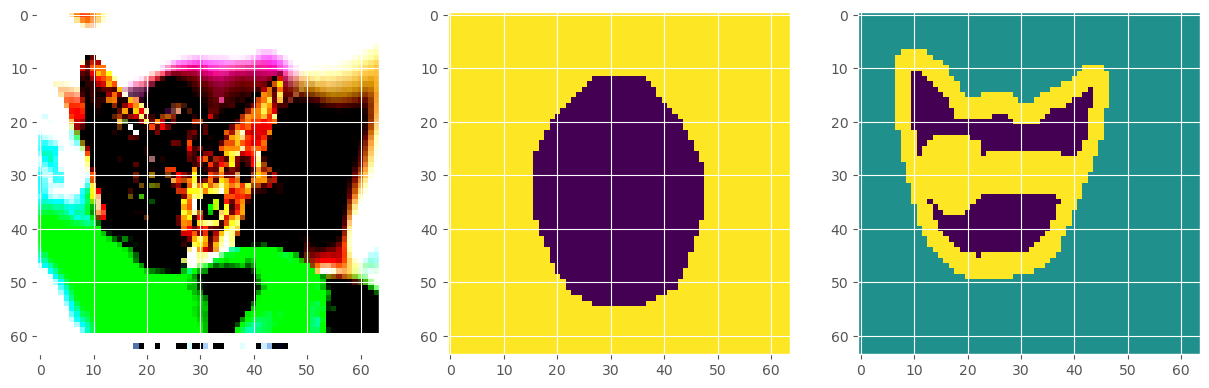

In [17]:
img, label = next(loader)
prediction = model(img)
res = prediction.argmax(dim=1)
fig, ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(img.view([3,64,64]).permute(1,2,0))
ax[1].imshow(res.view(64,64))
ax[2].imshow(label.view(64,64))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


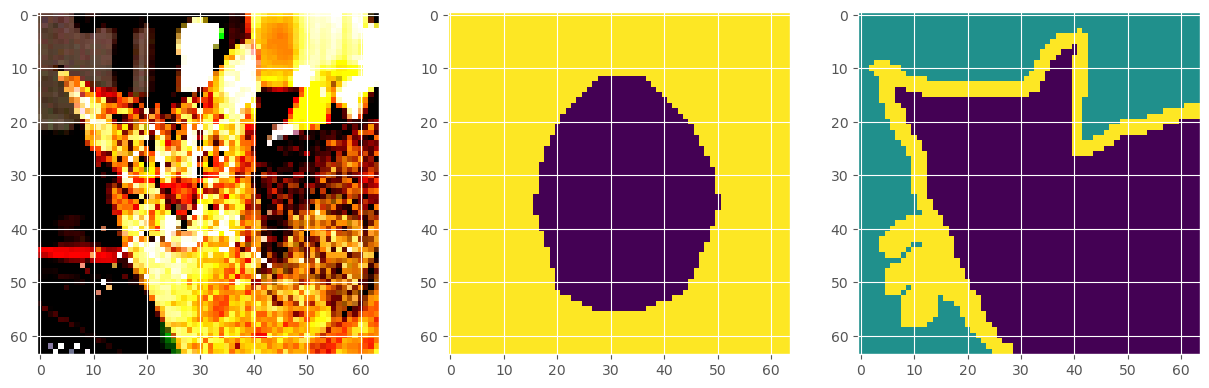

In [18]:
img, label = next(loader)
prediction = model(img)
res = prediction.argmax(dim=1)
fig, ax = plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(img.view([3,64,64]).permute(1,2,0))
ax[1].imshow(res.view(64,64))
ax[2].imshow(label.view(64,64))